In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UK_Mental_Health_data = pd.read_csv('Cleaned_UK_Mental_Health.csv')
UK_Mental_Health_data.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United Kingdom,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,No
1,Female,United Kingdom,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
2,Female,United Kingdom,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United Kingdom,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
4,Female,United Kingdom,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [3]:
# Information about the data
UK_Mental_Health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50576 entries, 0 to 50575
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   50576 non-null  object
 1   Country                  50576 non-null  object
 2   Occupation               50576 non-null  object
 3   self_employed            50576 non-null  object
 4   family_history           50576 non-null  object
 5   treatment                50576 non-null  object
 6   Days_Indoors             50576 non-null  object
 7   Growing_Stress           50576 non-null  object
 8   Changes_Habits           50576 non-null  object
 9   Mental_Health_History    50576 non-null  object
 10  Mood_Swings              50576 non-null  object
 11  Coping_Struggles         50576 non-null  object
 12  Work_Interest            50576 non-null  object
 13  Social_Weakness          50576 non-null  object
 14  mental_health_interview  50576 non-nul

In [4]:
#Overview of the data
UK_Mental_Health_data.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,50576,50576,50576,50576,50576,50576,50576,50576,50576,50576,50576,50576,50576,50576,50576,50576
unique,2,1,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United Kingdom,Housewife,No,No,No,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,43680,50576,11504,43515,35818,25986,11072,17424,18992,18080,17536,26848,18336,17920,38281,28798


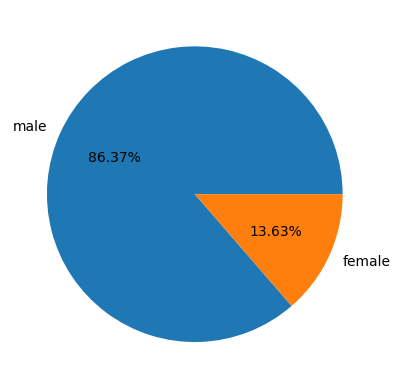

In [5]:
# Gender Check
Male_counts = UK_Mental_Health_data['Gender'].value_counts()['Male']
Female_counts = UK_Mental_Health_data['Gender'].value_counts()['Female']

# Plotting a pie chart
sizes= [Male_counts, Female_counts]
labels = ['male', 'female']
title = ['Gender Distribution']
plt.pie(sizes,  labels=labels, autopct='%1.2f%%')
plt.savefig('Gender.png', bbox_inches='tight')

C:\Users\HomePC\AppData\Local\Temp\ipykernel_18384\2974555305.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  occupation_percentages = occupation_counts.groupby('Gender').apply(lambda x: x.assign(Percentage=x['Count'] / x['Count'].sum() * 100))


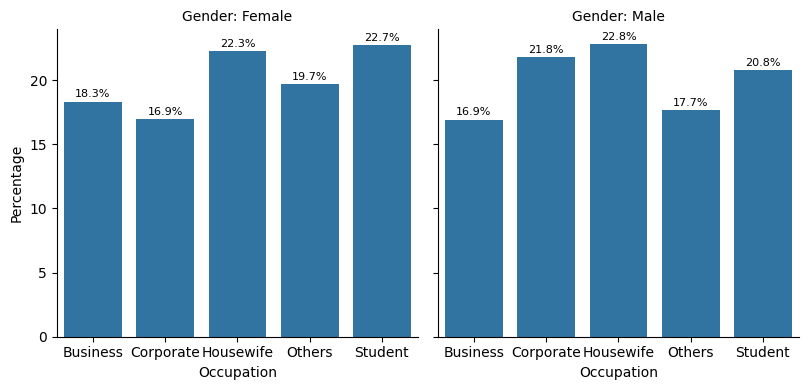

In [6]:
# Percentage of gender in each occupation in our dataset
# Calculating percentages
occupation_counts = UK_Mental_Health_data.groupby(['Gender', 'Occupation']).size().reset_index(name='Count')
occupation_percentages = occupation_counts.groupby('Gender').apply(lambda x: x.assign(Percentage=x['Count'] / x['Count'].sum() * 100))

grid = sns.FacetGrid(occupation_percentages, col='Gender', col_wrap=3, height=4)

#Function to calculate the % labels
def add_percentage_labels(x, y, **kwargs):
    ax = plt.gca()
    for index, value in enumerate(y):
        ax.annotate(f'{value:.1f}%', xy=(index, value), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=8, color='black')

# Mapping the labels on graphs
grid.map_dataframe(sns.barplot, 'Occupation', 'Percentage').map(add_percentage_labels, 'Occupation', 'Percentage')
grid.set_titles('Gender: {col_name}')
grid.set_axis_labels('Occupation', 'Percentage')
plt.tight_layout()
plt.savefig('Gender Vs Occupation.jpg', bbox_inches='tight')
plt.show()

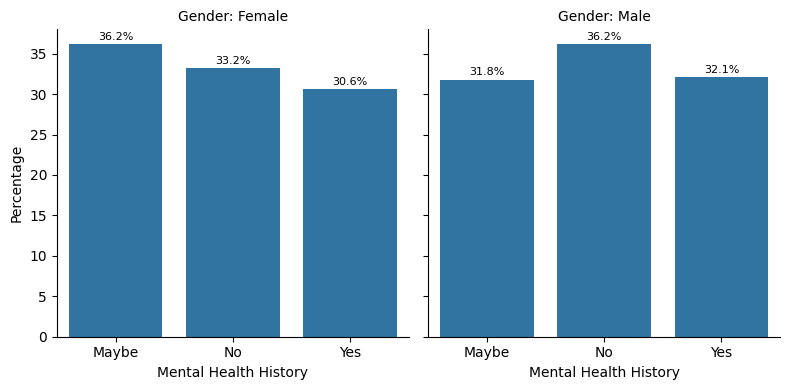

In [7]:
# Gender vs Mental_Health_History
# Calculate percentages
history_treatment_counts = UK_Mental_Health_data.groupby(['Gender', 'Mental_Health_History']).size().reset_index(name='Count')

# Total count of each gender
gender_counts = UK_Mental_Health_data['Gender'].value_counts().reset_index(name='Total_Count')
gender_counts.columns = ['Gender', 'Total_Count']
history_treatment_counts = pd.merge(history_treatment_counts, gender_counts, on='Gender')
history_treatment_counts['Percentage'] = (history_treatment_counts['Count'] / history_treatment_counts['Total_Count']) * 100

# Mental_Health_History order
order = ['Maybe', 'No', 'Yes']
grid = sns.FacetGrid(history_treatment_counts, col='Gender', col_wrap=2, height=4)

#Function to calculate the % labels
def add_percentage_labels(x, y, **kwargs):
    ax = plt.gca()
    for index, value in enumerate(y):
        ax.annotate(f'{value:.1f}%', xy=(index, value), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=8, color='black')
        
grid.map_dataframe(sns.barplot, 'Mental_Health_History', 'Percentage').map(add_percentage_labels, 'Mental_Health_History', 'Percentage', order = order)
grid.set_titles('Gender: {col_name}')
grid.set_axis_labels('Mental Health History', 'Percentage')
plt.tight_layout()
plt.savefig('Gender Vs Mental_Health.jpg', bbox_inches='tight')
plt.show()

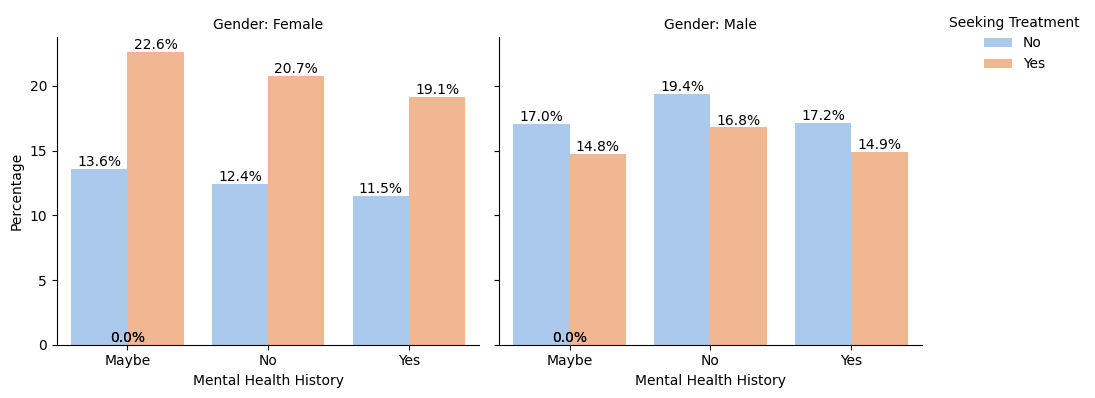

In [8]:
#Mental health history by gender and proportions of individuals seeking treatment.
# Calculate proportions of the grouped data
history_treatment_counts = UK_Mental_Health_data.groupby(['Gender', 'Mental_Health_History', 'treatment']).size().reset_index(name='Count')

# Calculate the total count of each gender then percentages
gender_counts = UK_Mental_Health_data['Gender'].value_counts().reset_index(name='Total_Count')
gender_counts.columns = ['Gender', 'Total_Count']
history_treatment_counts = pd.merge(history_treatment_counts, gender_counts, on='Gender')
history_treatment_counts['Percentage'] = (history_treatment_counts['Count'] / history_treatment_counts['Total_Count']) * 100
grid = sns.FacetGrid(history_treatment_counts, col='Gender', col_wrap=2, height=4)

# Map a bar plot of Mental_Health_History and Treatments against the percentage
def add_percentage_labels(ax):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x_position = p.get_x() + p.get_width() / 2
        y_position = p.get_height()
        ax.annotate(percentage, (x_position, y_position), ha='center', va='bottom')
grid.map_dataframe(sns.barplot, 'Mental_Health_History', 'Percentage', hue='treatment', palette='pastel')

# Add percentage labels to the bars
for ax in grid.axes:
    add_percentage_labels(ax)
grid.set_titles('Gender: {col_name}')
grid.set_axis_labels('Mental Health History', 'Percentage')
grid.add_legend(title='Seeking Treatment', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Gender Vs Mental_Health & Seeking Treatment.jpg', bbox_inches='tight')
plt.show()

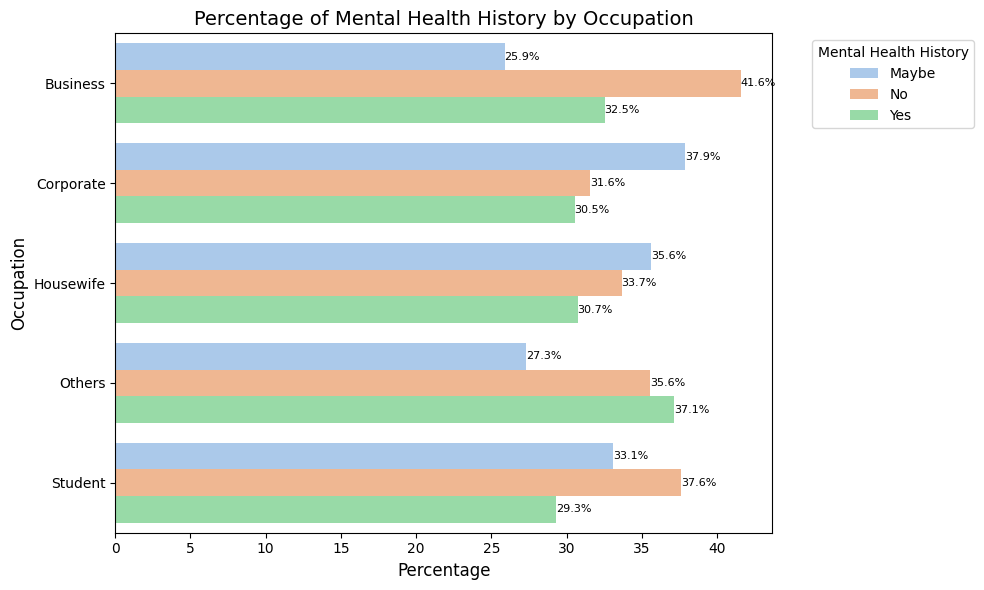

In [9]:
# Occupation Vs Mental Health History
# Grouping the data
occupation_history_counts = UK_Mental_Health_data.groupby(['Occupation', 'Mental_Health_History']).size().reset_index(name='Count')
# Calculate the total count of each occupation
occupation_counts = UK_Mental_Health_data['Occupation'].value_counts().reset_index(name='Total_Count')
occupation_counts.columns = ['Occupation', 'Total_Count']
occupation_history_counts = pd.merge(occupation_history_counts, occupation_counts, on='Occupation')
occupation_history_counts['Percentage'] = (occupation_history_counts['Count'] / occupation_history_counts['Total_Count']) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=occupation_history_counts, x='Percentage', y='Occupation', hue='Mental_Health_History', palette='pastel')
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.title('Percentage of Mental Health History by Occupation', fontsize=14)
plt.yticks(rotation=0, ha='right') # Rotating the y-axis labels for better readability
plt.legend(title='Mental Health History', bbox_to_anchor=(1.05, 1), loc='upper left')

# Fucntion to calculate and add the data labels
for p in ax.patches:
    width = p.get_width()
    if width > 2:  # Adjust the threshold as needed
        ax.text(width, p.get_y() + p.get_height() / 2.,
                '{:.1f}%'.format(width),
                ha='left', va='center', fontsize=8, color='black')
plt.tight_layout()
plt.savefig('Occupation Vs Mental_Health.jpg', bbox_inches='tight')
plt.show()

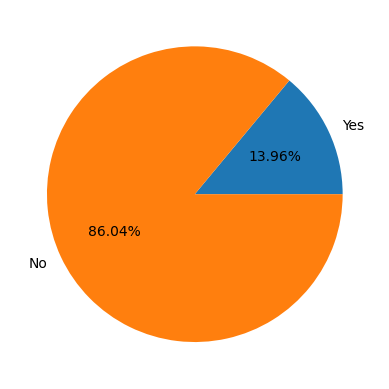

In [10]:
#Self Employed check
Yes_counts = UK_Mental_Health_data['self_employed'].value_counts()['Yes']
No_counts = UK_Mental_Health_data['self_employed'].value_counts()['No']

sizes= [Yes_counts, No_counts]
labels = ['Yes', 'No']
plt.pie(sizes,  labels=labels, autopct='%1.2f%%')
plt.savefig('Self Employed.jpg', bbox_inches='tight')

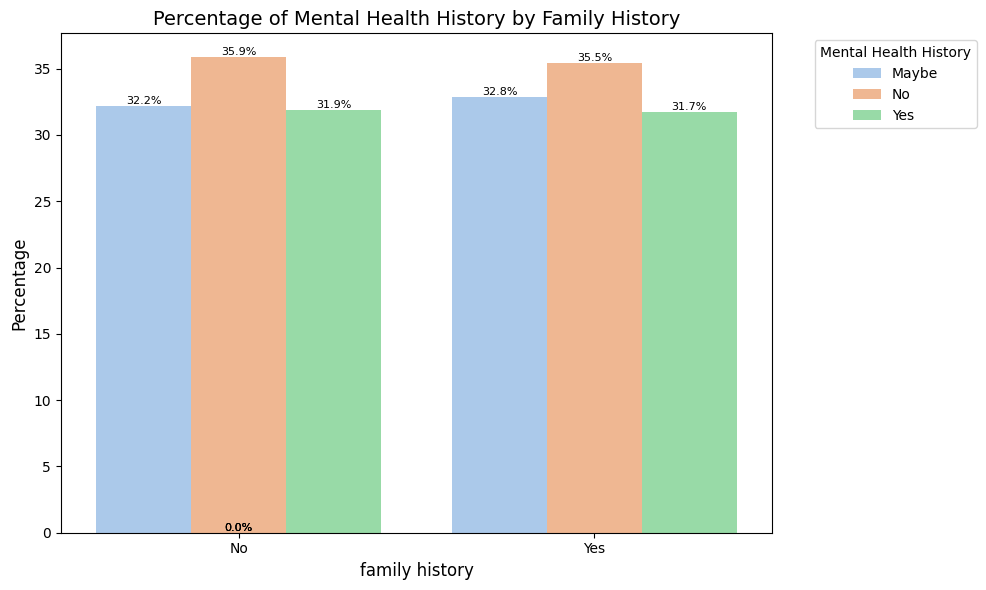

In [11]:
# Family History and Individuals Mental Health History
# Percentage of Mental Health History by Family History of the grouped data
history_family_counts = UK_Mental_Health_data.groupby(['family_history', 'Mental_Health_History']).size().reset_index(name='Count')

# Calculate the total count of each family history group
family_counts = UK_Mental_Health_data['family_history'].value_counts().reset_index(name='Total_Count')
family_counts.columns = ['family_history', 'Total_Count']
history_family_counts = pd.merge(history_family_counts, family_counts, on='family_history')
history_family_counts['Percentage'] = (history_family_counts['Count'] / history_family_counts['Total_Count']) * 100

#Creating the bar Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=history_family_counts, x='family_history', y='Percentage', hue='Mental_Health_History', palette='pastel')
plt.xlabel('family history', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Mental Health History by Family History', fontsize=14)
plt.legend(title='Mental Health History', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding the percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height,
            '{:.1f}%'.format(height),
            ha='center', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.savefig('Mental_Health vs Family History.jpg', bbox_inches='tight')
plt.show()

C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


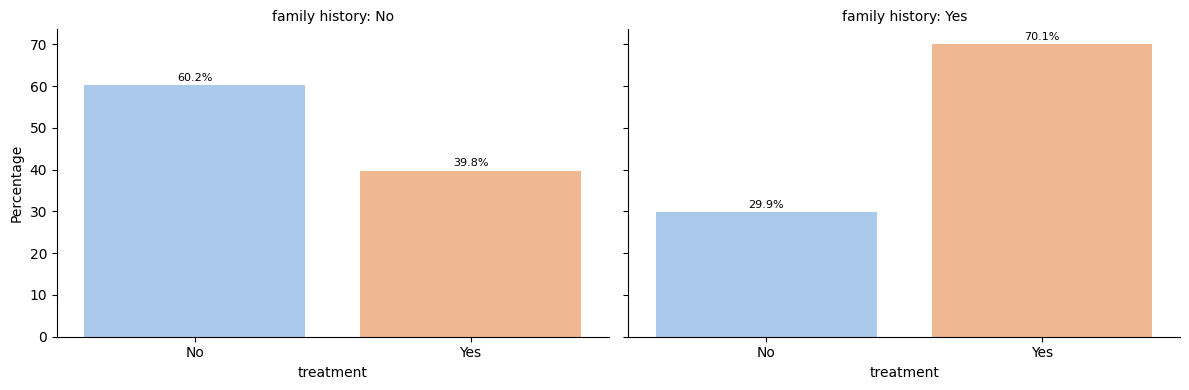

In [12]:
# Family history and them Seeking Treatment
# Calculate percentages of the grouped data
history_treatment_counts = UK_Mental_Health_data.groupby(['family_history', 'treatment']).size().reset_index(name='Count')

# Calculate the total count of each family history group
family_counts = UK_Mental_Health_data['family_history'].value_counts().reset_index(name='Total_Count')
family_counts.columns = ['family_history', 'Total_Count']

history_treatment_counts = pd.merge(history_treatment_counts, family_counts, on='family_history')
history_treatment_counts['Percentage'] = (history_treatment_counts['Count'] / history_treatment_counts['Total_Count']) * 100

grid = sns.FacetGrid(history_treatment_counts, col='family_history', height=4, aspect=1.5)
grid.set_axis_labels('treatment', 'Percentage')
grid.set_titles('treatment: {col_name}')

def add_percentage_labels(x, y, **kwargs):
    ax = plt.gca()
    for index, value in enumerate(y):
        ax.annotate(f'{value:.1f}%', xy=(index, value), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=8, color='black')
grid.map_dataframe(sns.barplot, 'treatment', 'Percentage', palette='pastel').map(add_percentage_labels, 'treatment', 'Percentage', palette='pastel')

grid.set_axis_labels('treatment', 'Percentage')
grid.set_titles('family history: {col_name}')
plt.tight_layout()
plt.savefig('Family history and Seeking Treatment.jpg', bbox_inches='tight')
plt.show()

C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


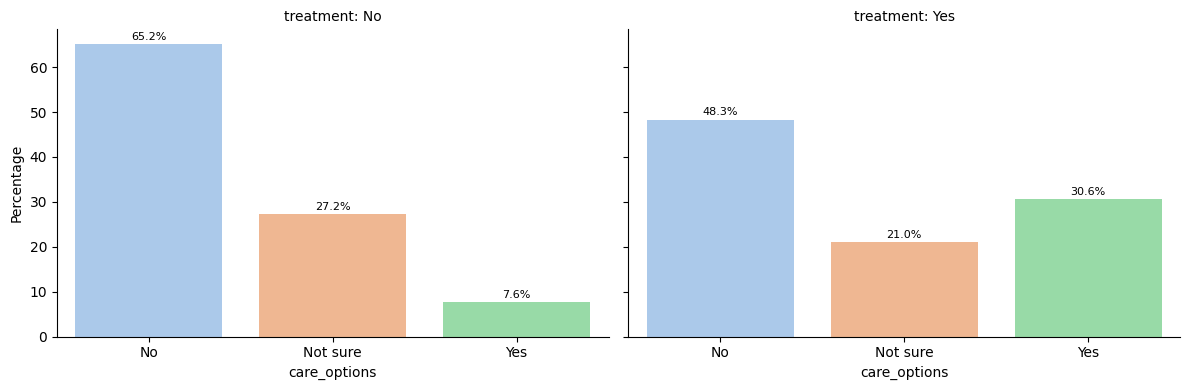

In [13]:
# Awareness of care Options (those in Seeking Treatment and Not seeking Treatment)
# Filter data for individuals with mental health history (Yes) and Grouping of the data 
mental_health_data = UK_Mental_Health_data[UK_Mental_Health_data['Mental_Health_History'] == 'Yes']
history_treatment_care_counts = mental_health_data.groupby(['treatment', 'care_options']).size().reset_index(name='Count')

# Calculate the total count of each treatment group and percentages
treatment_counts = mental_health_data['treatment'].value_counts().reset_index(name='Total_Count')
treatment_counts.columns = ['treatment', 'Total_Count']
history_treatment_care_counts = pd.merge(history_treatment_care_counts, treatment_counts, on='treatment')
history_treatment_care_counts['Percentage'] = (history_treatment_care_counts['Count'] / history_treatment_care_counts['Total_Count']) * 100

grid = sns.FacetGrid(history_treatment_care_counts, col='treatment', height=4, aspect=1.5)
grid.set_axis_labels('care options', 'Percentage')
grid.set_titles('treatment: {col_name}')
# Adding percentage labels to the bars
def add_percentage_labels(x, y, **kwargs):
    ax = plt.gca()
    for index, value in enumerate(y):
        ax.annotate(f'{value:.1f}%', xy=(index, value), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=8, color='black')

grid.map_dataframe(sns.barplot, 'care_options', 'Percentage', palette='pastel').map(add_percentage_labels, 'care_options', 'Percentage', palette='pastel')
plt.tight_layout()
plt.savefig('Seeking Treatment and Knowledge of care option.jpg', bbox_inches='tight')
plt.show()

C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\HomePC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\HomePC\AppData\Local\Programs\Python\Python

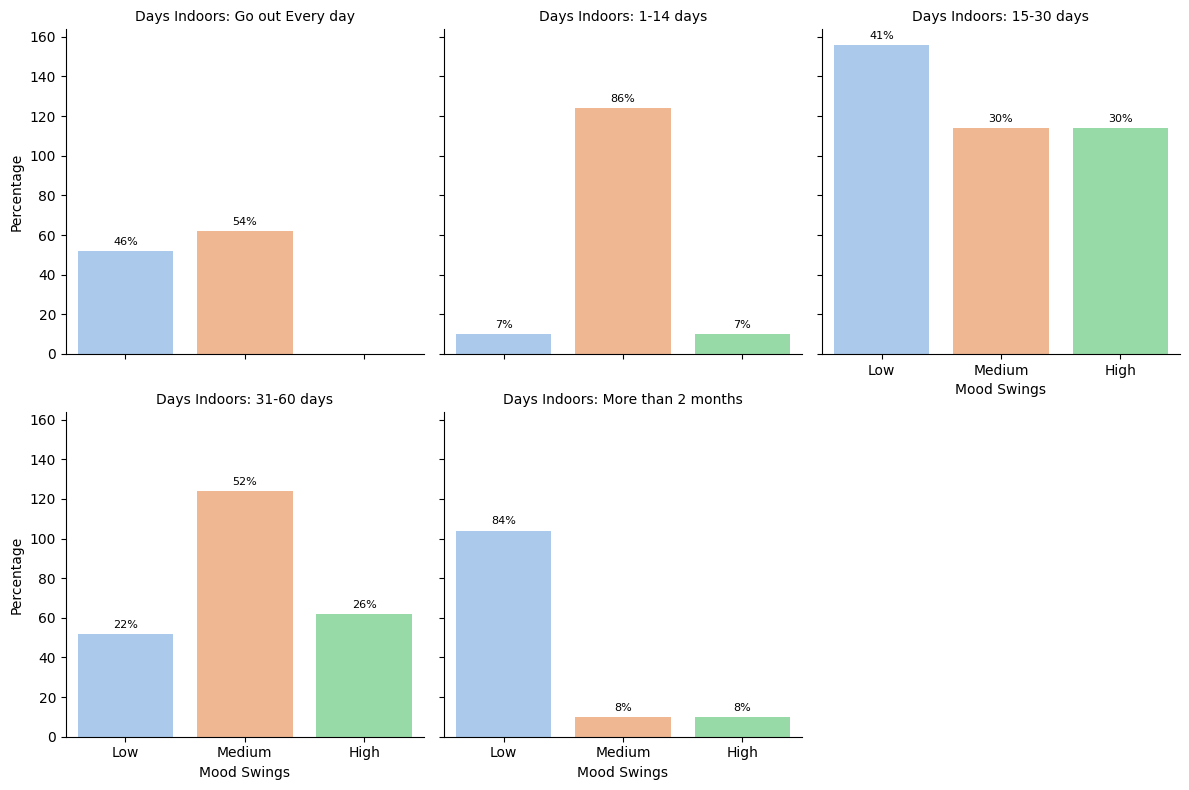

In [14]:
# Days Indoors Vs Mood Swing
# Order of the Dars Indoors
order = ['Go out Every day', '1-14 days', '15-30 days', '31-60 days', 'More than 2 months']

# Filter the data based on the specified conditions (Individual's Profile)
Profile = UK_Mental_Health_data[(UK_Mental_Health_data['Growing_Stress'] == 'Yes') & 
                                      (UK_Mental_Health_data['treatment'] == 'Yes') &
                                      (UK_Mental_Health_data['Mental_Health_History'] == 'Yes') &
                                      (UK_Mental_Health_data['Social_Weakness'] == 'No')]
#Setting of Facets 
grid = sns.FacetGrid(Profile, col='Days_Indoors', col_wrap=3, height=4, col_order= order)
# Function for label purposes,
def add_percentage_labels(x, **kwargs):
    total = float(len(x))
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height / total:.0%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 3),
                    textcoords='offset points')
#Mapping the graph
grid.map_dataframe(sns.countplot, 'Mood_Swings', order=['Low', 'Medium', 'High'], palette='pastel').map(add_percentage_labels, 'Mood_Swings')
grid.set_titles('Days Indoors: {col_name}')
grid.set_axis_labels('Mood Swings', 'Percentage')
plt.tight_layout()
plt.savefig('Days indoors and Mood Swings.jpg', bbox_inches='tight')
plt.show()